<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Evaluation and Improvement**

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 8.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d6fa6db0f2a53205d48fdcc3f2301910b588bff4713613ed7496540e3c773ca5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [4]:
#create a synthetic dataset
X, y = make_blobs(random_state=0)

In [5]:
# split data and labels into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# intantiate a model on the test set
logreg = LogisticRegression().fit(X_train, y_train)

In [7]:
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


La raison pour laquelle on fait la scission des données en entrainement et test est que nous voulons obtenir un cas de généralisation dans nos modèles.

Mais maintenant, nous nous intéressons à voir comment notre modèle fait l'entrainement des données et comment fait il la prédiction de nouvelles données


Dans ce chapitre on verra bien, deux aspects:

* **cross-validation** qui est un de plus grand moyen d'atteindre les performances de généralisation
* et discuter des methodes pour faire l'évaluation de performance de classification et regression

Mais nous parlerons aussi de **grid search** qui permet de rechercher les meilleurs paramètres pour nos modèles

## **Cross-Validation**

La validation croisée est une méthode statistique d'évaluation des performances de généralisation qui
est plus stable et approfondi que d'utiliser une division en un ensemble d'entraînement et un ensemble de test.

Ici les données sont rapidement divisés et plusieurs modèles sont aussi entrainer

La version de cross-validation la plus utilisée est **k-fold** ou k est nombre définit par l'utilisateur et qui varie notamment de 5 à 10.

- Lorsque l'on choisit k égale à 5, les données sont divisées en 5 parties égales appelées **folds(plis)**

**Illustration**

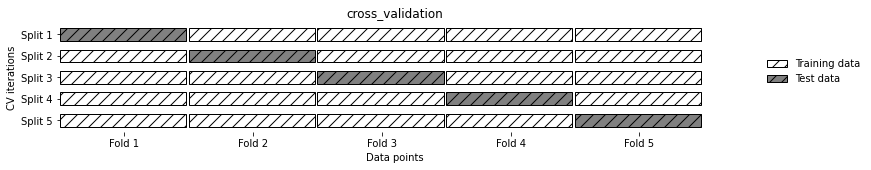

In [8]:
mglearn.plots.plot_cross_validation()

### **Cross validation inf sklearn**

On retrouve  **cross_val_score** dans le module **model_selection** de sklearn

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [11]:
iris = load_iris()

In [12]:
logreg = LogisticRegression(max_iter=10000)

NB: Par défaut, **cross_val_score** à 3 plis(**folds**) et donne l'algorithme renvoie trois valeurs de précision

- On peut ajuster le nombre de plis(**folds**) grâce au paramètre **cv** de **cross_val_score**

In [13]:
cross_val_score(logreg, iris.data, iris.target, cv=3)

array([0.98, 0.96, 0.98])

In [14]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

In [15]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Pour évaluer la précision de la validation croisée, on calcule la moyenne de scores

In [16]:
print("Average corss-validation {:.2f}".format(scores.mean()))

Average corss-validation 0.97


**Inconvénient de la cross validation**

Et qu'elle coute en terme de temps pour la formation de chaque plis

### **Stratified k-Fold Cross-Validation and Other Strategies**


En validation croisée stratifiée, nous
diviser les données de telle sorte que les proportions entre les classes soient les mêmes dans chaque pli comme
ils sont dans l'ensemble de données,

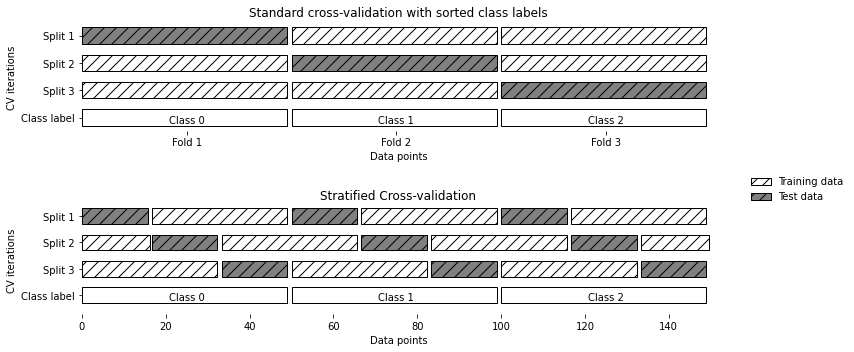

In [17]:
mglearn.plots.plot_stratified_cross_validation()

#### **More control over cross validation**

In [18]:
from sklearn.model_selection import KFold

In [19]:
kfold = KFold(n_splits=5)

In [20]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

In [21]:
print("Cross validation score {}".format(scores))

Cross validation score [1.         1.         0.86666667 0.93333333 0.83333333]


In [22]:
scores.mean()

0.9266666666666665

In [23]:
kfold = KFold(n_splits=3)

In [24]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [25]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [26]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

### **Leave-one-out cross-validation**

Il est donne donne des bonnes performances pour de petit dataset

Il consomme trop en terme de temps

Ici chaque fold est un simple échantillon

In [27]:
from sklearn.model_selection import LeaveOneOut

In [28]:
loo = LeaveOneOut()

In [29]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

In [30]:
print("Number of cv iterations", len(scores))
print("Mean accuracy {:.2f}".format(scores.mean()))

Number of cv iterations 150
Mean accuracy 0.97


### **Shuffle-split cross-validation**


La validation croisée Shuffle-split permet de contrôler le nombre d'itérations indépendamment des tailles d'entraînement et de test, ce qui peut parfois être utile. Il permet également
pour n'utiliser qu'une partie des données à chaque itération, en fournissant train_size et
paramètres test_size qui ne totalisent pas un. Sous-échantillonner les données de cette manière peut être
utile pour expérimenter avec de grands ensembles de données.

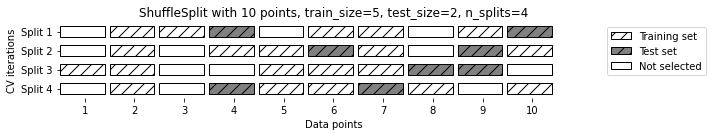

In [31]:
mglearn.plots.plot_shuffle_split()

In [32]:
from sklearn.model_selection import ShuffleSplit

In [33]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

In [34]:
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([0.96      , 0.96      , 0.92      , 0.96      , 0.97333333,
       0.96      , 0.97333333, 0.98666667, 0.94666667, 0.94666667])

In [35]:
_.mean()

0.9586666666666668

### **Cross-validation with groups**

Classer les données dans les groupes enfin d'avoir des bonnes données à entrainer et éviter d'avoir les mêmes données dans l'entrainement et le test



In [36]:
from sklearn.model_selection import GroupKFold

In [37]:
X, y = make_blobs(n_samples=12, random_state=0)

In [38]:
X.shape

(12, 2)

In [39]:
cross_val_score(logreg, X, y, cv=3).mean()

0.75

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [41]:
np.unique(y)

array([0, 1, 2])

In [42]:
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

print("Score:")
cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))

Score:


array([0.75      , 0.6       , 0.66666667])

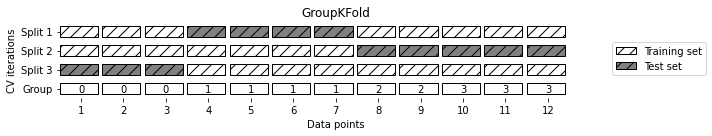

In [43]:
mglearn.plots.plot_group_kfold()

On voit que chaque group et soit dans l'entrainement soit dans le test

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
list_neighbors = [x for x in range(1, 45)]

scores = [cross_val_score(KNeighborsClassifier(n_neighbors=x), iris.data, iris.target, cv=5).mean() for x in list_neighbors]

In [46]:
scores

[0.96,
 0.9466666666666665,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9800000000000001,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666666,
 0.9666666666666668,
 0.96,
 0.9666666666666668,
 0.96,
 0.96,
 0.9466666666666667,
 0.96,
 0.9466666666666665,
 0.9466666666666667,
 0.9399999999999998,
 0.9333333333333332,
 0.9399999999999998,
 0.9333333333333332,
 0.9466666666666665,
 0.9399999999999998,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9333333333333333,
 0.9400000000000001,
 0.9266666666666667,
 0.9400000000000001,
 0.9400000000000001,
 0.9400000000000001,
 0.9266666666666667]

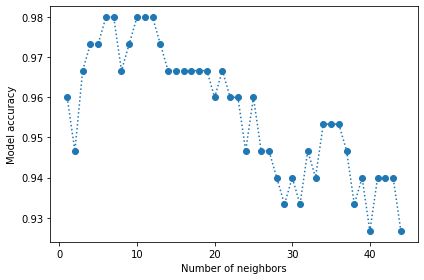

In [47]:
plt.plot(list_neighbors, scores, ':o')
plt.xlabel("Number of neighbors")
plt.ylabel("Model accuracy")
plt.tight_layout()

## **Grid Search**

Nous allons voir comment améliorer les performances de modèles en ajustant ses paramètres.

### **Simple Grid Search**

Le Grid Search simple consiste à rechercher des paramètres en utilisant une boucle **for** pour évaluer le classificateur

In [48]:
from sklearn.svm import SVC

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [50]:
print(f"Size of training set: {X_train.shape[0]}\nSize of test set: {X_test.shape[0]}")

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)

    score = svm.score(X_test, y_test)

    if score > best_score:
      best_score = score
      best_parameters = {"C":C, 'gamma':gamma}

print("Best score {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112
Size of test set: 38
Best score 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### **The Danger of Overfitting the Parameters and the Validation Set**

Lorsque l'on conçoit des modèles, on doit faire en sorte que les données pour tester le modèle ne soient pas encore vu en avance par l'algorithme.

Puisque nous venons de voir précédemment que le modèle nous a fourni 97% ce qui fait de lui un bon mais peut être pas.

Alors pour éviter d'avoir des données connues ou déjà vu d'avance par le modèle, Nous devons disposer de données pour évaluer le modèle que nous appelerons **Validation Set**

**Illustation**

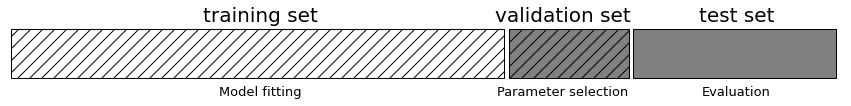

In [51]:
mglearn.plots.plot_threefold_split()

Après avoir trouvé, le bon modèle avec des bonnes performances grâce au **validation set**, alors on peut réconstruire le modèle et faire le dernier test avec le **test set**

In [52]:
from sklearn.svm import SVC

In [53]:
# split into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [55]:
print(" Size of training set: {}\n Size of validation set: {}\n Size of test set {}".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]
))

baset_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=C, gamma=gamma)
    svm.fit(X_train, y_train)

    score = svm.score(X_valid, y_valid)

    if score > best_score:
      best_score = score
      best_parameters = {"C":C, 'gamma':gamma}


svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("\nBest score of validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

 Size of training set: 84
 Size of validation set: 28
 Size of test set 38

Best score of validation set: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.97


### **Grid Search with Cross-Validation**

On peut évaluer les performances du modèle avec **cross_val_score** et sélectionner celui qui nous donne des très bonnes performances

In [56]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma=gamma, C=C)
    
    scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
    score = np.mean(scores)

    if score > best_score:
      best_score = score
      best_parameters = {"C":C, 'gamma':gamma}
    
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

print('Best score', best_score)
print("Best parameters", best_parameters)
print("Test set score", svm.score(X_test, y_test))

Best score 0.9731225296442687
Best parameters {'C': 10, 'gamma': 0.1}
Test set score 0.9736842105263158


Voici comment les meilleurs paramètres sont sélectionnés:

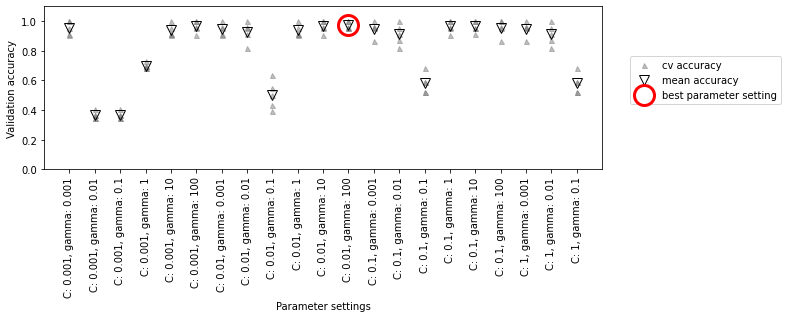

In [57]:
mglearn.plots.plot_cross_val_selection()

Voici comment est résumé le processus de **splitting data**, **rig search**, rt **évaluation des paramètres finales**

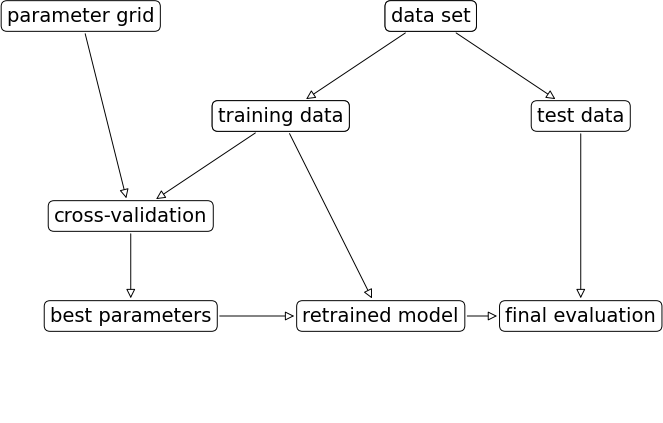

In [58]:
mglearn.plots.plot_grid_search_overview()

Comme la cross validation se fait conjonctement avec le grid search, une classe **GridSearchCV** est implémenté dans sklearn pour résoudre tous les problèmes liés à la généralisation de modèle.

Pour pouvoir utiliser **GridSearchCV**, nous devons en premier lieu  déclarer les paramètres à lui soumettre pour faire de tests

In [59]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}

print("Grille de paramètres:\n{}".format(param_grid))

Grille de paramètres:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [63]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [64]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [65]:
print("Best parameter", grid_search.best_params_)

Best parameter {'C': 10, 'gamma': 0.1}


In [66]:
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best cross-validation score: 0.97


In [67]:
print("Best estimator:\n", grid_search.best_estimator_)

Best estimator:
 SVC(C=10, gamma=0.1)


#### **Analyzing the result of cross-validation**

In [68]:
results = pd.DataFrame(grid_search.cv_results_)

In [69]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001798,0.000089,0.000832,0.000081,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.002052,0.001496,0.000612,0.000141,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001031,0.000010,0.000448,0.000028,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001022,0.000007,0.000446,0.000007,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001125,0.000195,0.000463,0.000020,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [70]:
results.shape

(36, 15)

In [71]:
len(results.columns)

15

In [72]:
score = np.array(results.mean_test_score).reshape(6, 6)

In [73]:
score

array([[0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.36640316, 0.36640316, 0.36640316, 0.36640316,
        0.36640316],
       [0.36640316, 0.69644269, 0.90158103, 0.95533597, 0.36640316,
        0.36640316],
       [0.69644269, 0.93794466, 0.96403162, 0.94664032, 0.9284585 ,
        0.50158103],
       [0.93794466, 0.96403162, 0.97312253, 0.94624506, 0.91106719,
        0.58142292],
       [0.96403162, 0.96442688, 0.95494071, 0.94624506, 0.91106719,
        0.58142292]])

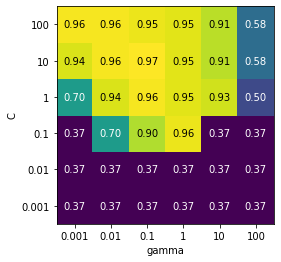

In [74]:
mglearn.tools.heatmap(score, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], cmap='viridis')
plt.show()

##### **Nested cross-validation(validation croisée imbriquée)**

Cette validation consiste à faire des splits multiples de cross-validation au lieu d'en faire un seul en ayant de données d'entrainement et de test une seule fois.

Cette procedure renvoie une liste de scores pas un model et encore moins pas les paramètres. N'oublions pas que le score nous montre comment le modèle généralise

In [75]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid=param_grid, cv=5),
                iris.data, iris.target, cv=5)

In [76]:
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [77]:
scores.mean()

0.9800000000000001

## **Evaluation Metrics and Scoring**

Jusqu'à présent, nous avons évalué les performances de classification en utilisant la précision (la fraction de
échantillons correctement classés) et les performances de régression en utilisant R 2 . Cependant, ce sont
seulement deux des nombreuses façons possibles de résumer les performances d'un modèle supervisé sur un ensemble de données donné. En pratique, ces métriques d'évaluation peuvent ne pas être appropriées pour votre application, et il est important de choisir la bonne métrique lors de la sélection
entre les modèles et les paramètres de réglage.

#### **Keep the End Goal in Mind**

Lors de la sélection d'une métrique, vous devez toujours avoir à l'esprit l'objectif final de l'application d'apprentissage automatique. En pratique, nous sommes généralement intéressés non seulement à faire
prévisions exactes, mais en utilisant ces prévisions dans le cadre d'un processus décisionnel plus large. Avant de choisir une métrique de machine learning, vous devez réfléchir à
l'objectif de haut niveau de l'application, souvent appelé **métrique métier(metric business)**.

Les conséquances de choisir un algo de machine learning sont appelés:
**Business impact**


### **Metrics for Binaray Classification**



In [78]:
from sklearn.datasets import load_digits

In [79]:
digits = load_digits()

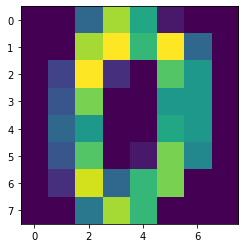

In [80]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np

plt.imshow(digits.images[0])

In [81]:
!pip install mglearn

In [82]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [83]:

y = digits.target == 9
y

array([False, False, False, ..., False,  True, False])

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

On va à présent utiliser l'algorithme **DummyClassifier** Pour classer la classe la plus majoritaire

In [85]:
from sklearn.dummy import DummyClassifier

In [86]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

In [87]:
np.unique(pred_most_frequent)

array([False])

In [88]:
print("Test score", dummy_majority.score(X_test, y_test))

Test score 0.8955555555555555


In [89]:
#Compare with other Classifier
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [91]:
pred_tree = tree.predict(X_test)

In [92]:
print("Test score with tree: ", tree.score(X_test, y_test))

Test score with tree:  0.9177777777777778


In [93]:
# comparing with linear model
from sklearn.linear_model import LogisticRegression

In [94]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: ", dummy.score(X_test, y_test))

logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score:", logreg.score(X_test, y_test))

dummy score:  0.8955555555555555
logreg score: 0.98


###### **Matrices de confusion**

L'une des façons les plus complètes de représenter le résultat de l'évaluation de la classification binaire consiste à utiliser des matrices de confusion. Inspectons les prédictions de LogisticRegres
sion de la section précédente à l'aide de la fonction **confusion_matrix**. Nous avons déjà
stocké les prédictions sur le jeu de test dans pred_logreg :

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion = confusion_matrix(y_test, pred_logreg)

In [97]:
confusion

array([[400,   3],
       [  6,  41]])

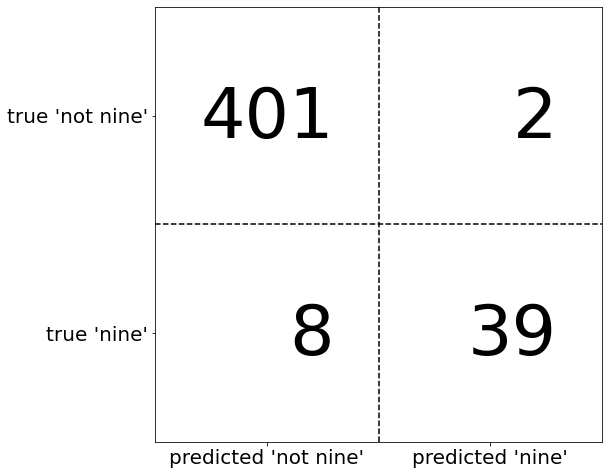

In [98]:
mglearn.plots.plot_confusion_matrix_illustration()

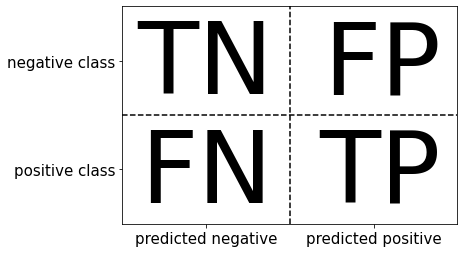

In [99]:
mglearn.plots.plot_binary_confusion_matrix()

In [100]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nTree model:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Tree model:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[400   3]
 [  6  41]]


In [101]:
from sklearn.metrics import f1_score

In [102]:
print("f1 more score frequent:")
print(f1_score(y_test, pred_most_frequent)) 

print("\nf1 dummy score:")
print(f1_score(y_test, pred_dummy))

print("\nf1 Tree score:")
print(f1_score(y_test, pred_tree))

print("\nf1 linear score:")
print(f1_score(y_test, pred_logreg))

f1 more score frequent:
0.0

f1 dummy score:
0.0

f1 Tree score:
0.5542168674698795

f1 linear score:
0.9010989010989012


In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test, pred_most_frequent))

              precision    recall  f1-score   support

       False       0.90      1.00      0.94       403
        True       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
print(classification_report(y_test, pred_most_frequent,
     target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print(classification_report(y_test, pred_dummy,
                     target_names=['not nine', 'nine']))

print('\n',classification_report(y_test, pred_logreg,
                           target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


               precision    recall  f1-score   support

    not nine       0.99      0.99      0.99       403
        nine       0.93      0.87      0.90        47

    accuracy                           0.98       450
   macro avg       0.96      0.93      0.94       450
weighted avg       0.98      0.98      0.98       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


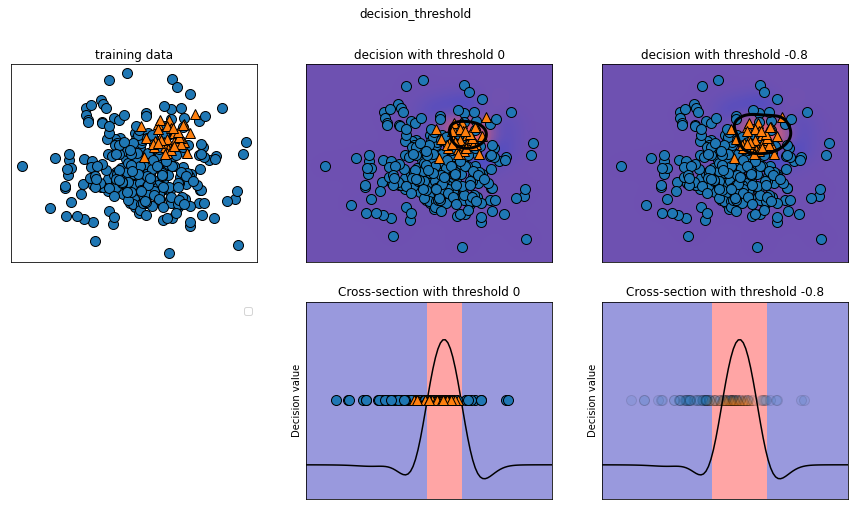

In [107]:
mglearn.plots.plot_decision_threshold()

In [108]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [109]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
random_state=22)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [111]:
svc = SVC(gamma=.05).fit(X_train, y_train)

In [112]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Souvent, lors du développement d'un nouveau modèle, il n'est pas tout à fait clair quel est le **point de fonctionnement**
sera. Pour cette raison, et pour mieux comprendre un problème de modélisation, il est instructif
pour examiner tous les seuils possibles, ou tous les compromis possibles de précision et de rappels à
une fois que. Ceci est possible en utilisant un outil appelé la courbe de rappel de précision. Vous pouvez trouver le
pour calculer la courbe précision-rappel dans le module sklearn.metrics. Ce
a besoin de l'étiquetage de vérité terrain et des incertitudes prévues, créées via
decision_function ou predict_proba :

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

In [115]:
precision

array([0.32142857, 0.2962963 , 0.30769231, 0.32      , 0.33333333,
       0.34782609, 0.36363636, 0.38095238, 0.4       , 0.36842105,
       0.33333333, 0.35294118, 0.375     , 0.4       , 0.42857143,
       0.38461538, 0.41666667, 0.45454545, 0.4       , 0.44444444,
       0.5       , 0.57142857, 0.66666667, 0.6       , 0.5       ,
       0.66666667, 0.5       , 1.        , 1.        ])

In [116]:
recall

array([1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.77777778,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.55555556, 0.55555556, 0.55555556, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.33333333, 0.22222222,
       0.22222222, 0.11111111, 0.11111111, 0.        ])

la fonction **precision_recall_curve** renvoie une liste des précisions, rappels pour tous les seuils possibles

In [133]:
X, y = make_blobs(n_samples=(4000, 5000), cluster_std=[7.0, 2],
                  random_state=22)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [135]:
svc = SVC(gamma=0.05).fit(X_train, y_train)

In [148]:
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

In [137]:
# trouvé le seuil le plus proche de séro
close_zero = np.argmin(np.abs(precision))

In [138]:
close_zero

2223

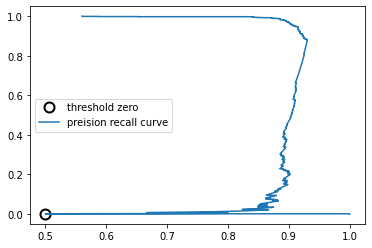

In [142]:
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='preision recall curve')
plt.legend()
plt.show()

**La fonction average_precision_score** permet de résumer la courbe de précision



La comparaison de deux courbes de précision-rappel fournit beaucoup d'informations détaillées, mais est assez
processus manuel. Pour la comparaison automatique de modèles, nous pourrions souhaiter résumer les
informations contenues dans la courbe, sans nous limiter à un seuil ou à un point de fonctionnement particulier. Une façon particulière de résumer la courbe précision-rappel est
en calculant **l'intégrale ou l'aire sous la courbe de la précision**, la courbe de rappel, également
connue sous le nom de **précision moyenne**. 4 Vous pouvez utiliser la fonction average_precision_score
pour calculer la précision moyenne. Parce que nous devons calculer la courbe ROC et
considérer plusieurs seuils, le résultat de decision_function ou predict_proba
doit être passé à average_precision_score , pas au résultat de predict :

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [153]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

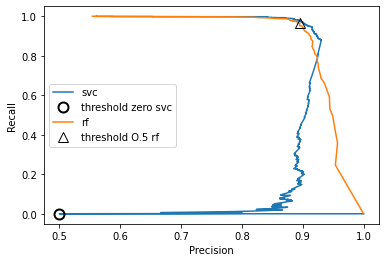

In [157]:
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label='threshold O.5 rf', fillstyle='none', mew=1)
plt.xlabel("Precision")
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

In [158]:
print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('\n f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.928

 f1_score of svc: 0.933


**f1_score** renvoie un seuil par défaut d'un modèle.

Le seuil c'est la précision

In [159]:
from sklearn.metrics import average_precision_score

In [161]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

In [162]:
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc {:.3f}".format(ap_svc))

Average precision of random forest: 0.937
Average precision of svc 0.899


##### **Receiver operating characteristics (ROC) and AUC(Caractéristiques de fonctionnement du récepteur (ROC) et AUC)**


Il existe un autre outil couramment utilisé pour analyser le comportement des classifieurs à
différents seuils : la courbe des caractéristiques de fonctionnement du récepteur, ou courbe ROC. Semblable à la courbe précision-rappel, la courbe ROC considère tous les seuils possibles pour un classificateur donné, mais au lieu de signaler la précision et le rappel, elle montre
le taux de faux positifs (FPR) par rapport au taux de vrais positifs (TPR). Rappelons que le vrai
le taux positif est simplement un autre nom pour le rappel, tandis que le taux de faux positifs est la fraction de faux positifs sur tous les échantillons négatifs :

In [163]:
from sklearn.metrics import roc_curve

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

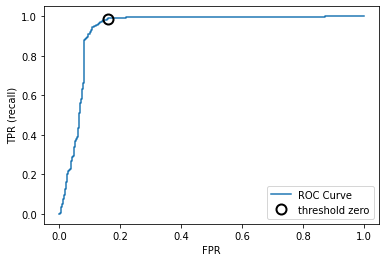

In [168]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle="none", c='k', mew=2)
plt.legend()
plt.show()

Il y'a une fonction qui permet de donner un nombre sur le ROC elle est:
**roc_auc_score(receiver operating curve,  area under the curve)**

In [169]:
from sklearn.metrics import roc_auc_score

In [173]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

In [174]:
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.950
AUC for SVC: 0.936


NB: **roc_auc_score** est le meilleur metrique qu'il faut utiliser pour tout le problème de classification déséquilibré

In [175]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

gamma= 1.00 accuracy = 0.90 AUC = 0.50
gamma= 0.05 accuracy = 0.90 AUC = 1.00
gamma= 0.01 accuracy = 0.90 AUC = 1.00


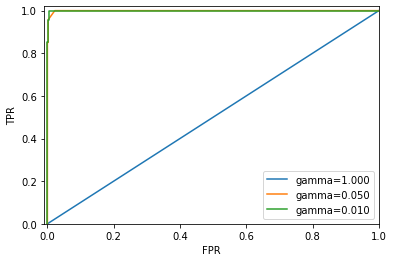

In [177]:
plt.figure()

for gamma in [1, 0.05, 0.01]:
  svc = SVC(gamma=gamma).fit(X_train, y_train)
  accuracy = svc.score(X_test, y_test)

  auc = roc_auc_score(y_test, svc.decision_function(X_test))

  fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
  print("gamma= {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
      gamma, accuracy, auc
  ))
  plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))

plt.xlabel("FPR")
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')
plt.show()